Task # 5 - To explore Business Analytics

In [124]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
#Reading the CSV file
df=pd.read_csv('https://raw.githubusercontent.com/kislay960/The-Sparks-Foundation/master/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [126]:
#Preprocessing data
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [127]:
df.duplicated().sum()

17

In [128]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [129]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [131]:
#Dropping useless Columns
df=df.drop(['Postal Code'],axis=1)
df=df.drop(['Country'],axis=1)

In [132]:
#Correlation among each other
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


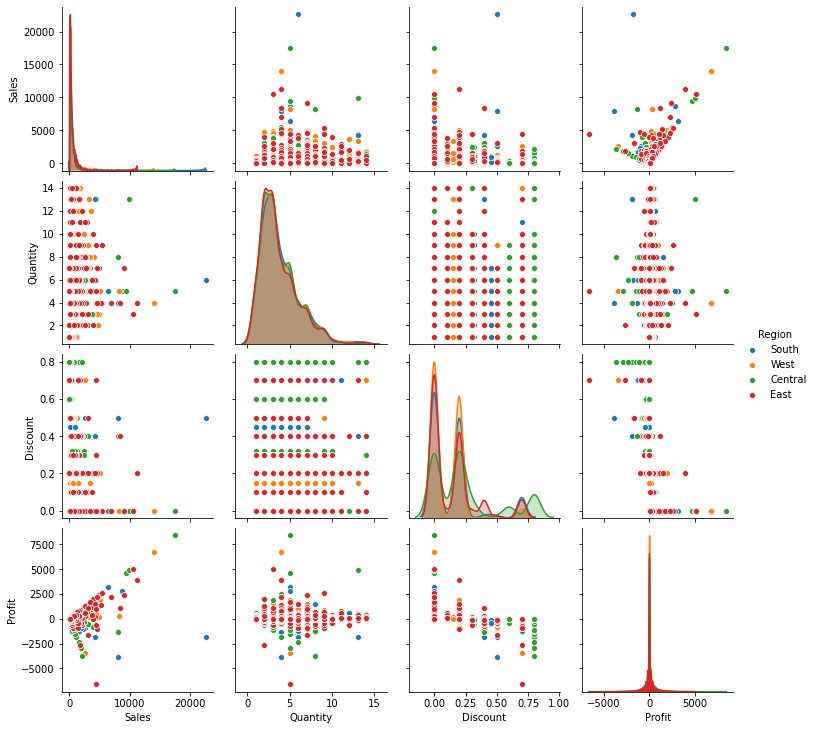

In [133]:
#Plotting pair plot for every pair
sns.pairplot(df,hue='Region')
plt.show()

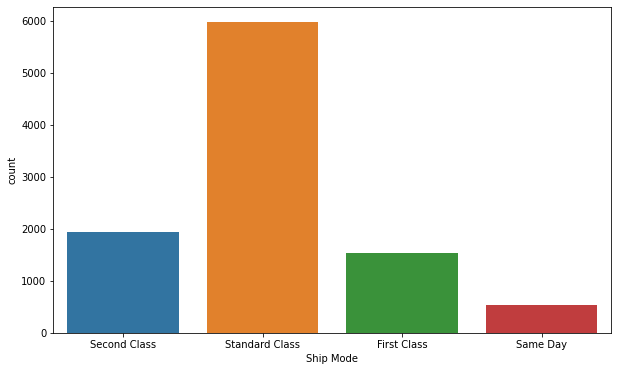

In [134]:
#Analysis of shipping mode
plt.figure(figsize=(10,6))
sns.countplot(x=df['Ship Mode'])
plt.show()

ANALYSIS : Standard Class is doing better than others. Same day shipping mode needs much improvement.

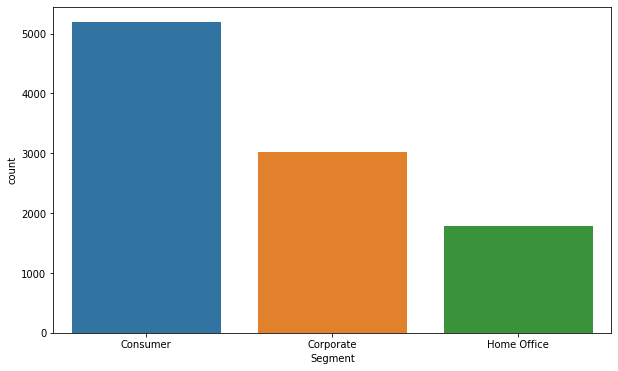

In [135]:
#Analysis of Segments
plt.figure(figsize=(10,6))
sns.countplot(x=df['Segment'])
plt.show()

ANALYSIS : Consumer Segment is performing exceptionally well.

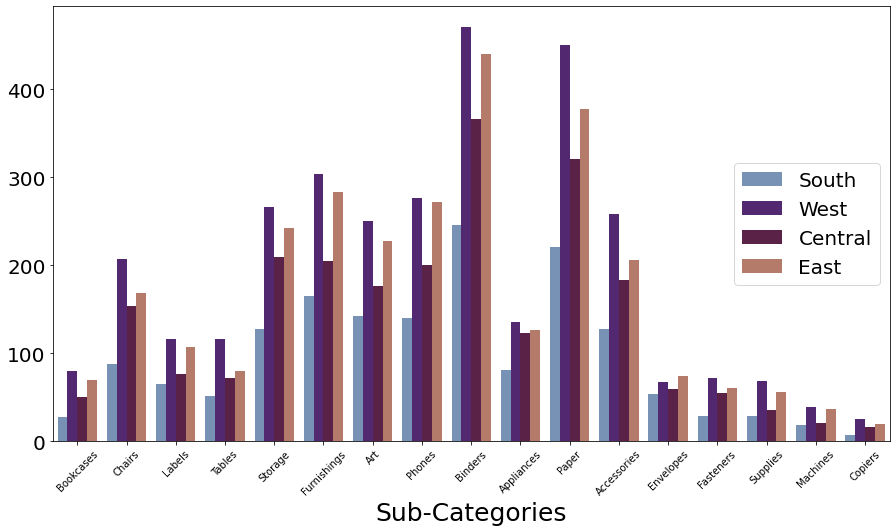

In [136]:
#Analysis of different regions
plt.figure(figsize = (15,8))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='twilight')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Sub-Categories',fontsize=25)
plt.ylabel('',fontsize=20)
plt.legend(loc=5,fontsize=20)

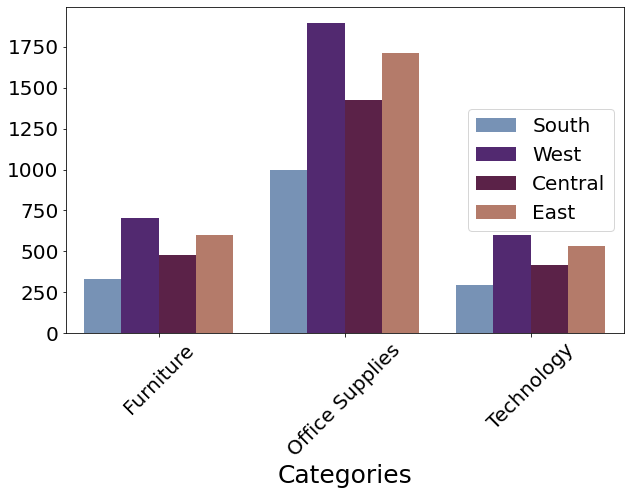

In [137]:
plt.figure(figsize = (10,6))
sns.countplot(x='Category',hue='Region',data=df,palette='twilight')
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Categories',fontsize=25)
plt.ylabel('',fontsize=20)
plt.legend(loc=5,fontsize=20)

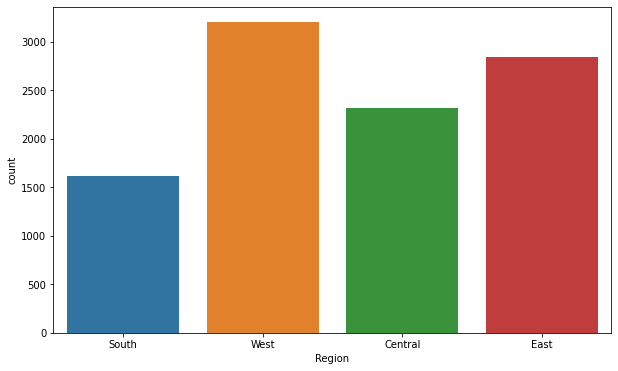

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Region'])
plt.show()

ANALYSIS : From the above three graphs, we can analyze that the sales in south is the lowest.

Text(0, 0.5, 'Quantities ordered')

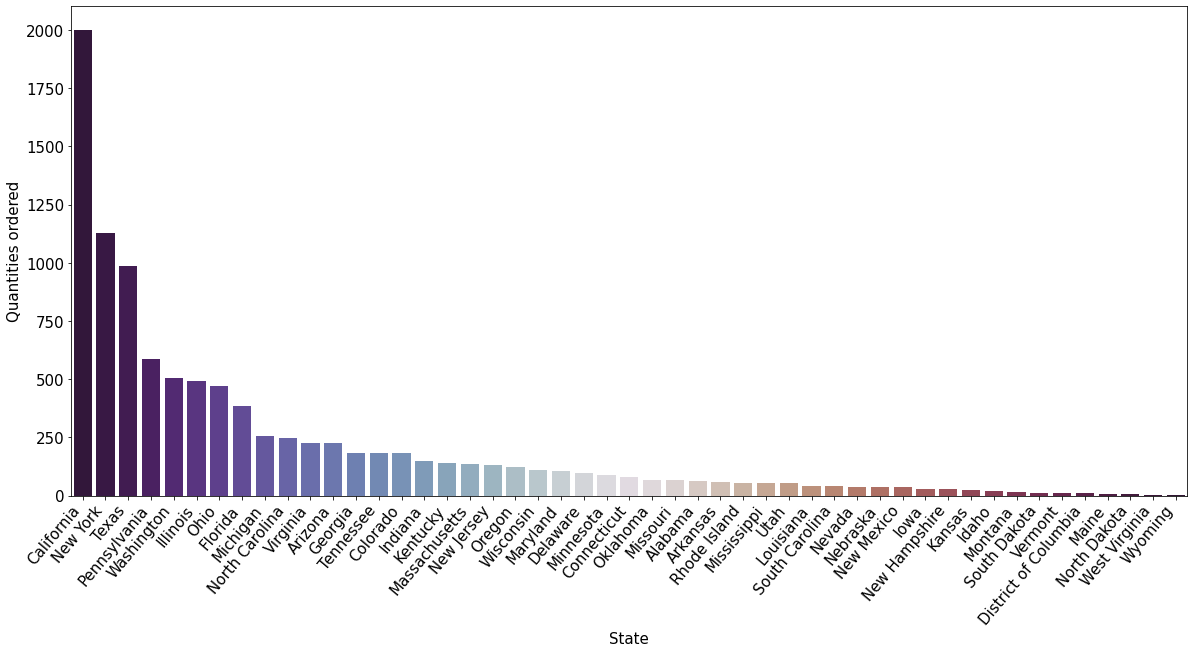

In [139]:
#Locationwise analysis
plt.figure(figsize = (20, 9))
sns.countplot(x = df['State'],palette = 'twilight_shifted', order = (df['State'].value_counts().head(50)).index)
plt.xticks(rotation=50,ha='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Quantities ordered',fontsize=15)

In [140]:
import folium
map=folium.Map(location=[37.0902,-95.7129],zoom_start=5)
states=pd.read_csv('https://raw.githubusercontent.com/kislay960/The-Sparks-Foundation/master/datasets_772_1440_statelatlong.csv')
states.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [141]:
latitude = 37.0902
longitude = -95.7129
map = folium.Map(location=[latitude, longitude], zoom_start=4.2)

#Red colour for locations with loss and green for locations with profit.
def colorfunc(temp):
  if temp>0:
    return 'green'
  else:
    return 'red'

for city in states['City']:
  profit=df.loc[df['State'] == city, 'Profit'].sum()
  folium.Marker([states.loc[states['City']==city,'Latitude'].iloc[0],states.loc[states['City']==city,'Longitude'].iloc[0]],
                folium.Popup(profit),
                icon=folium.Icon(color=colorfunc(profit))).add_to(map)

In [142]:
map

ANALYSIS : From the graph and map, we can analyze the regions with low sales and develop new business models to increase sales in these areas.
The areas with red pointers are the one in loss.

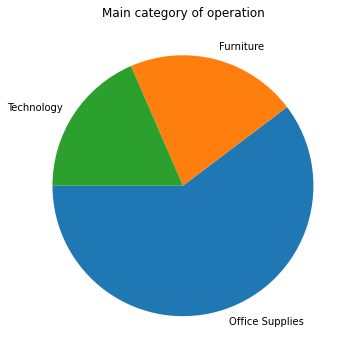

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [143]:
#Analysis of category of Operations
plt.figure(figsize=(12,6))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, startangle=180, radius=1)
plt.title('Main category of operation')
plt.show()
print (df['Category'].value_counts())

ANALYSIS : Office Supplies have higher number of orders

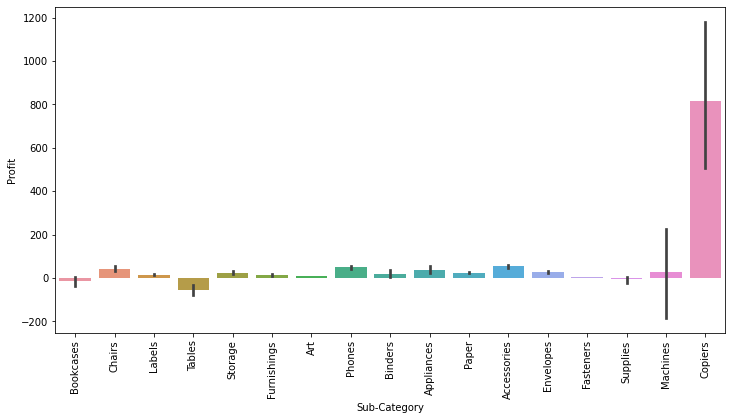

In [144]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.xticks(rotation=90)
plt.show()

ANALYSIS : From the above bar plot, we can analyze the products resulting in loss

Text(-4.575000000000003, 0.5, 'Profit')

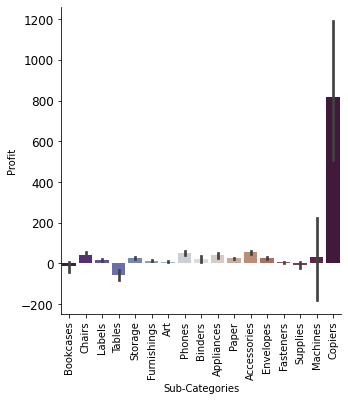

In [145]:
sns.catplot('Sub-Category','Profit',data=df,kind='bar',palette='twilight_shifted')
plt.xticks(rotation=90,size=10)
plt.yticks(size=12)
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')

ANALYSIS : From the above plot, we can analyze that every item except Copiers are not doing well in the market.